## Recession Predictor Code


In [ ]:
# Courtesy - https://colab.research.google.com/drive/16_L6VEZtCy2V_TVT1dVysBUt89brT2nq#scrollTo=sZzat2JbJBuy

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))
print(df)

    quarter  US03M_1   US02Y  ...  gdp_growth  real_growth  recession
0         1   6.0408  6.4420  ...        5.83        -0.20          1
1         2   6.0375  5.6386  ...        5.79        -0.24          1
2         3   4.3416  4.3920  ...        5.45        -0.25          1
3         4   3.2079  3.6022  ...        4.86        -0.74          1
4         5   1.8134  2.9263  ...        7.99         2.99          0
..      ...      ...     ...  ...         ...          ...        ...
75       76   4.3671  4.4713  ...        7.82         3.55          0
76       77   4.5425  5.1840  ...        8.63         3.80          0
77       78   4.8216  5.6772  ...        8.14         2.91          0
78       79   5.4744  6.2851  ...        7.81         3.14          0
79       80   5.8201  6.4519  ...        6.44         1.94          0

[80 rows x 11 columns]


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 0, 'GDP Growth')

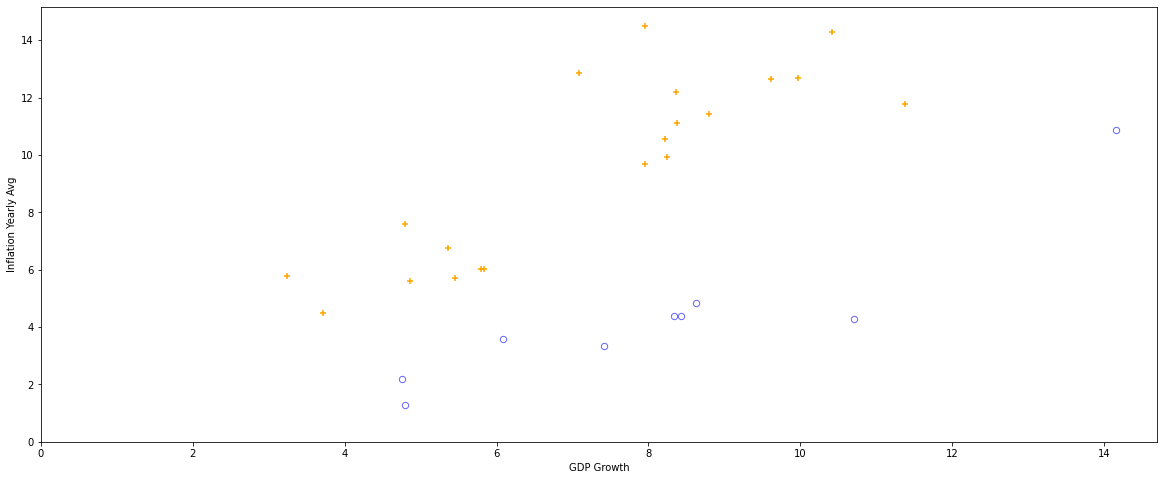

In [ ]:
fig = plt.figure(figsize=(20,25//3))
ax1 = plt.subplot()

# Take a fraction of the samples where target value (recession) is 0 (no recession)
df_no = df[df.recession == 0].sample(frac=0.15)

# Take all samples where target value is 1 (recession)
df_yes = df[df.recession == 1]
df_ = df_no.append(df_yes)

# build scatterplot using matplotlib
ax1.scatter(df_yes.gdp_growth, df_yes.inflation_avg, s=40, c='orange', marker='+', linewidths=1)
ax1.scatter(df_no.gdp_growth, df_no.inflation_avg, s=40, marker='o', linewidths='1', edgecolors='blue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Inflation Yearly Avg')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('GDP Growth')


In [ ]:
import numpy as np
import sklearn.linear_model as skl_lm
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Real Growth vs Recession

In [ ]:
X_train = df.real_growth.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.real_growth.min(), df.real_growth.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[2.49787345e-06 9.99997502e-01]
 [1.68874817e-05 9.99983113e-01]
 [1.14162468e-04 9.99885838e-01]
 [7.71326991e-04 9.99228673e-01]
 [5.19174948e-03 9.94808251e-01]
 [3.40812605e-02 9.65918739e-01]
 [1.92602946e-01 8.07397054e-01]
 [6.17266632e-01 3.82733368e-01]
 [9.15993089e-01 8.40069109e-02]
 [9.86616476e-01 1.33835237e-02]
 [9.97997600e-01 2.00240028e-03]
 [9.99703318e-01 2.96682429e-04]
 [9.99956106e-01 4.38935717e-05]
 [9.99993507e-01 6.49256725e-06]
 [9.99999040e-01 9.60324815e-07]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


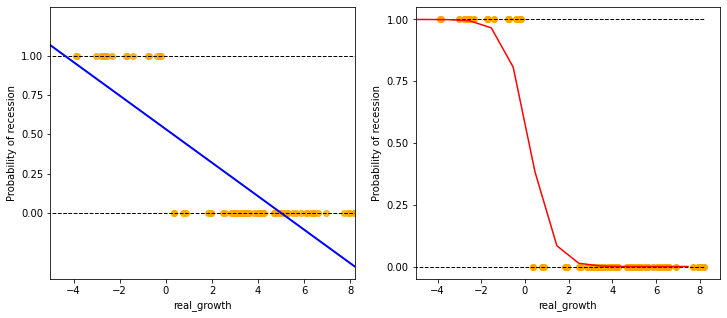

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.real_growth, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('real_growth')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-5)

## 3 Month Bond Yield vs Recession

In [ ]:
X_train = df.US03M_1.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US03M_1.min(), df.US03M_1.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.77226617 0.22773383]
 [0.76363536 0.23636464]
 [0.75478132 0.24521868]
 [0.74570606 0.25429394]
 [0.73641222 0.26358778]
 [0.72690311 0.27309689]
 [0.7171827  0.2828173 ]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


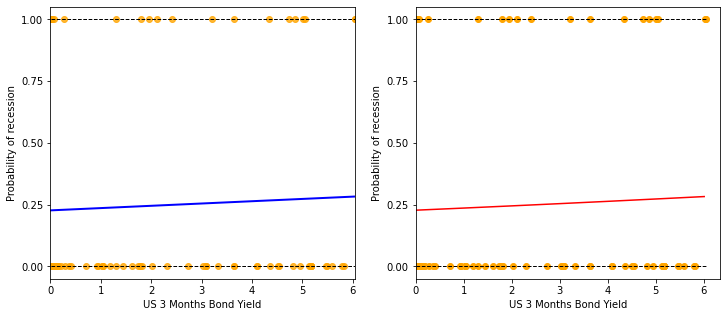

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US03M_1, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 3 Months Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## 2 Years Bond Yield vs Recession 

In [ ]:
X_train = df.US02Y.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US02Y.min(), df.US02Y.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.7314029  0.2685971 ]
 [0.73820975 0.26179025]
 [0.74490426 0.25509574]
 [0.75148521 0.24851479]
 [0.75795155 0.24204845]
 [0.76430241 0.23569759]
 [0.77053708 0.22946292]
 [0.77665503 0.22334497]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


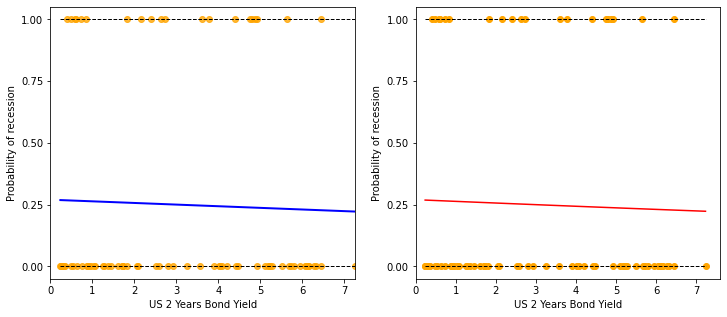

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US02Y, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 2 Years Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## 3 Years Bond Yield vs Recession

In [ ]:
X_train = df.US03Y.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US03Y.min(), df.US03Y.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.69335115 0.30664885]
 [0.71445105 0.28554895]
 [0.73465473 0.26534527]
 [0.75392129 0.24607871]
 [0.77222264 0.22777736]
 [0.78954284 0.21045716]
 [0.80587709 0.19412291]
 [0.82123063 0.17876937]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


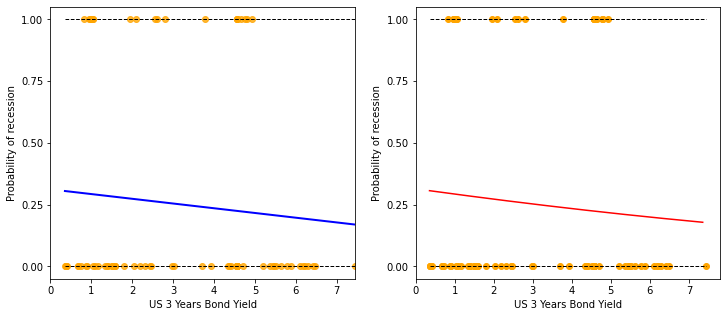

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US03Y, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 3 Years Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## 5 Years Bond Yield vs Recession

In [ ]:
X_train = df.US05Y.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US05Y.min(), df.US05Y.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.6818782  0.3181218 ]
 [0.70687747 0.29312253]
 [0.7306881  0.2693119 ]
 [0.75323976 0.24676024]
 [0.77448582 0.22551418]
 [0.7944019  0.2055981 ]
 [0.81298383 0.18701617]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


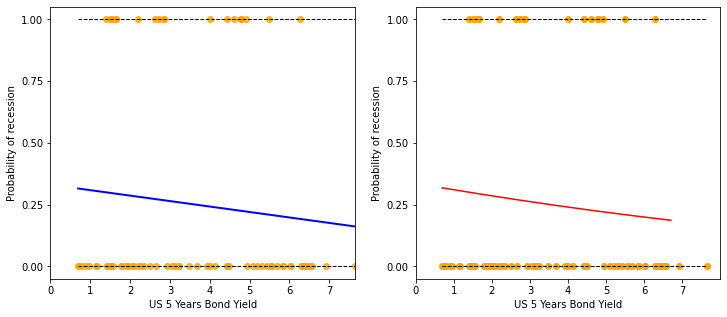

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US05Y, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 5 Years Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## 10 Years Bond Yield vs Recession

In [ ]:
X_train = df.US10Y.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US10Y.min(), df.US10Y.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.61135658 0.38864342]
 [0.66708667 0.33291333]
 [0.7185049  0.2814951 ]
 [0.76478183 0.23521817]
 [0.80551031 0.19448969]
 [0.84065591 0.15934409]
 [0.87047174 0.12952826]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


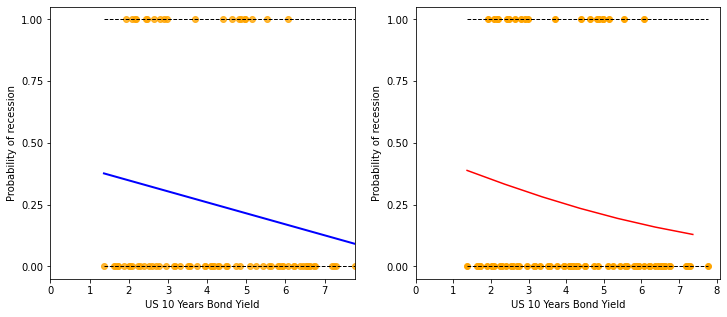

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US10Y, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 10 Years Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## 30 Years Bond Yield vs Recession

In [ ]:
X_train = df.US30Y.values.reshape(-1,1) 
y = df.recession
X_test = np.arange(df.US30Y.min(), df.US30Y.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)

prob = clf.predict_proba(X_test)
print("prob =", prob)

prob = [[0.50751913 0.49248087]
 [0.60612922 0.39387078]
 [0.69679072 0.30320928]
 [0.77435254 0.22564746]
 [0.83672299 0.16327701]
 [0.88442688 0.11557312]
 [0.91953368 0.08046632]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


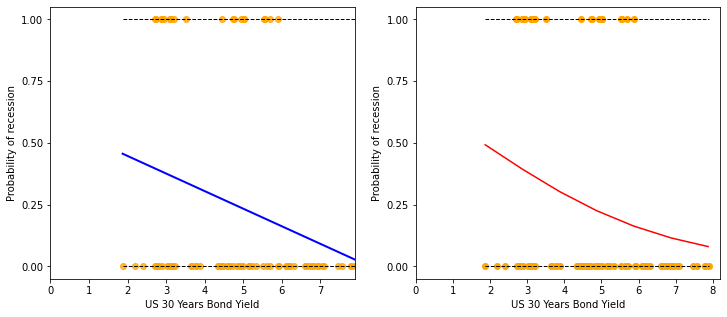

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot 
sns.regplot(df.US30Y, df.recession, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'blue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='red')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of recession')
    ax.set_xlabel('US 30 Years Bond Yield')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

## หา Standard Error จาก Logistic Regression ของตัวแปรต่าง ๆ ด้วย statistics 

In [ ]:
X_test = sm.add_constant(df[['real_growth', 'US03M_1', 'US02Y','US03Y','US05Y','US10Y','US30Y']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-23.696685,1.573382e+07,-0.000002,0.999999,-3.083775e+07,3.083770e+07
real_growth,-35.077364,2.103820e+06,-0.000017,0.999987,-4.123447e+06,4.123377e+06
US03M_1,25.013533,7.990993e+06,0.000003,0.999998,-1.566203e+07,1.566208e+07
US02Y,-84.437533,8.009525e+06,-0.000011,0.999992,-1.569847e+07,1.569830e+07
US03Y,21.408018,2.061924e+06,0.000010,0.999992,-4.041274e+06,4.041317e+06
US05Y,42.481354,2.444463e+07,0.000002,0.999999,-4.791055e+07,4.791063e+07
US10Y,67.436587,5.640417e+07,0.000001,0.999999,-1.105501e+08,1.105502e+08
US30Y,-58.228406,3.627597e+07,-0.000002,0.999999,-7.109966e+07,7.109954e+07
